In [91]:
import moviepy.editor as mpe
import matplotlib.pyplot as plt
import imageio
import os
import numpy as np 
from PIL import Image
from tqdm import tqdm 

In [ ]:
filename = "/media/home/alex/fun/icarl_editing/seminars/david/david_camera_recording.mp4"
slide_ims_dir = 'seminars/david/david_slides_fixed'
output_path = 'slide_assignments.npy'

In [ ]:
# Load video
video = mpe.VideoFileClip(filename)
np_frame = video.get_frame(0) # get frame by index

213 379


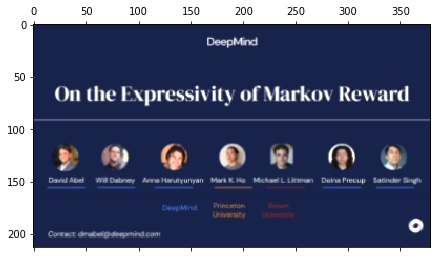

In [81]:
# Specify region containing the video
video_region = ((428,641),(9,388))

w = video_region[0][1] - video_region[0][0]
h = video_region[1][1] - video_region[1][0]
plt.matshow(np_frame[video_region[0][0]:video_region[0][1],video_region[1][0]:video_region[1][1]])

In [82]:
slide_nums = list(sorted(map(lambda x: int(x.split('.')[0][5:]), os.listdir(slide_ims_dir))))

# Load slides
slide_arr = np.zeros((len(slide_nums), w, h, 3), dtype=np.uint8)
for slide_num in slide_nums :
    file_name = f'./{slide_ims_dir}/Slide{slide_num}.jpeg'
    im = imageio.imread(file_name, pilmode='RGB')
    im = np.array(Image.fromarray(im).resize((h,w), resample=Image.NEAREST))
    slide_arr[slide_num-1] = im


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
(49, 213, 379, 3)


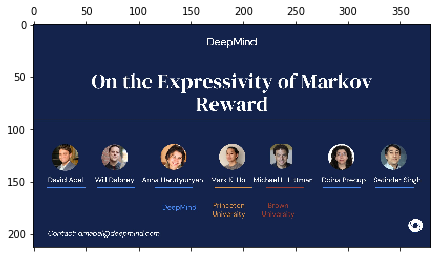

In [83]:
plt.matshow(slide_arr[0])

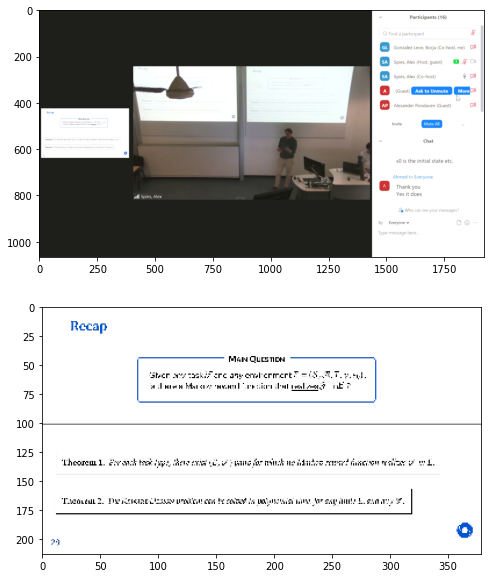

In [87]:
# Test matching for a single frame in the video
vid =  video.get_frame(2013)

def find_matching_slide(curr_frame, prev_slide, slide_arr, neighbors):
    curr_frame = curr_frame[video_region[0][0]:video_region[0][1],video_region[1][0]:video_region[1][1]]
    prev_slide = prev_slide - 1
    best_match_val = -10
    best_match = 0
    for offset in sorted(np.arange(-neighbors, neighbors+1), key=lambda x: abs(x)):
        if not (0 <= prev_slide+offset < len(slide_arr)):
            continue
        slide = slide_arr[prev_slide + offset]
        dist = np.sum((slide - np.mean(slide)) * (curr_frame - np.mean(curr_frame)) ) / ((slide.size - 1) * np.std(slide) * np.std(curr_frame))
        if dist > best_match_val:
            best_match = prev_slide + offset + 1
            best_match_val = dist
    return best_match

match = find_matching_slide(vid, 23, slide_arr, 40)
f, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].imshow(vid)
ax[1].imshow(slide_arr[match-1])

In [112]:
total_frames = video.duration*video.fps
frame = None

# Process the video - usually takes ~15 min (you can use the 'parse_video.py' script to do this as well)
matched_slide = 1
slide_assignments = np.zeros((int(video.duration)+1, 2), dtype=np.uint32)
frame = 0 
pbar = tqdm(total=total_frames)
for frame_num, frame in enumerate(video.iter_frames()):
    if frame_num % video.fps != 0:
        continue
    second = int(frame_num // video.fps)
    matched_slide  = find_matching_slide(frame, matched_slide, slide_arr, 8)
    slide_assignments[second] = [frame_num, matched_slide]
    if int(second)//60 % 5 > 0 and int(second)//60 % 5 == 0:
        print(int(second)//300, " minutes passed")
    pbar.update(1)
np.save(output_path, slide_assignments)

  0%|          | 242/109141.2 [01:19<9:56:15,  3.04it/s]


KeyboardInterrupt: 